# **Setup & Loading**

**1. Data Ingestion & Preprocessing**.   
We begin by loading the historical stock data for ENGRO, PSO, and FABL. We restrict the analysis to the fiscal years 2013–2018 and standardise the date index to ensure a consistent time-series analysis.

In [ ]:
# Cell 3: Load and Clean Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data
try:
    engro = pd.read_csv('/content/ENGRO.csv')
    pso = pd.read_csv('/content/PSO.csv')
    fabl = pd.read_csv('/content/FABL.csv')
    print("✓ All 3 files loaded successfully")
except FileNotFoundError as e:
    print(f"✗ Error: {e}. Please check file paths.")

# 2. Clean Data Function (FIXED - no duplicate date conversion)
def clean_data(df, start_date='2013-01-01', end_date='2019-12-31'):
    """Load and clean stock data with date filtering"""
    data = df.copy()
    # Convert to datetime (DO THIS ONCE)
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        # Set as index and sort
        data.set_index('Date', inplace=True)
        data.sort_index(inplace=True)
        # Filter to desired period
        return data.loc[start_date:end_date]
    else:
        print("Warning: No 'Date' column found")
        return data

# 3. Apply Cleaning
engro_clean = clean_data(engro)
pso_clean = clean_data(pso)
fabl_clean = clean_data(fabl)

# 4. Data Quality Check
print("\n📊 DATA QUALITY CHECK:")
print("="*40)
for name, df in zip(['ENGRO', 'PSO', 'FABL'], [engro_clean, pso_clean, fabl_clean]):
    print(f"{name}:")
    print(f"  • Date Range: {df.index.min().date()} to {df.index.max().date()}")
    print(f"  • Trading Days: {len(df)}")
    print(f"  • Missing Values: {df.isnull().sum().sum()}")
    print(f"  • Starting Price: ₹{df['Close'].iloc[0]:.2f}")
    print(f"  • Ending Price: ₹{df['Close'].iloc[-1]:.2f}")
    print()

✓ All 3 files loaded successfully

📊 DATA QUALITY CHECK:
ENGRO:
  • Date Range: 2013-01-01 to 2019-12-31
  • Trading Days: 1825
  • Missing Values: 0
  • Starting Price: ₹80.32
  • Ending Price: ₹345.25

PSO:
  • Date Range: 2013-01-01 to 2019-12-31
  • Trading Days: 1825
  • Missing Values: 0
  • Starting Price: ₹101.22
  • Ending Price: ₹191.64

FABL:
  • Date Range: 2013-01-01 to 2019-12-31
  • Trading Days: 1825
  • Missing Values: 0
  • Starting Price: ₹6.35
  • Ending Price: ₹19.02



In [ ]:
# Cell 3.5: Calculate Basic Returns (ADD THIS NEW CELL)
print("📈 BASIC PERFORMANCE CALCULATION:")
print("="*40)

# Create a dictionary for easy access
stocks = {
    'ENGRO': engro_clean,
    'PSO': pso_clean,
    'FABL': fabl_clean
}

# Calculate simple metrics
print("\n💰 TOTAL RETURN (2013-2019):")
print("-" * 40)
for name, df in stocks.items():
    start_price = df['Close'].iloc[0]
    end_price = df['Close'].iloc[-1]
    total_return = ((end_price - start_price) / start_price) * 100
    print(f"{name}: ₹{start_price:.2f} → ₹{end_price:.2f} = {total_return:+.2f}%")

# Calculate annualized returns
print("\n📅 ANNUALIZED PERFORMANCE:")
print("-" * 40)
for name, df in stocks.items():
    start_price = df['Close'].iloc[0]
    end_price = df['Close'].iloc[-1]
    years = 6  # 2013-2019 = 6 years
    total_return = end_price / start_price
    annual_return = (total_return ** (1/years) - 1) * 100
    print(f"{name}: {annual_return:.2f}% per year")

📈 BASIC PERFORMANCE CALCULATION:

💰 TOTAL RETURN (2013-2019):
----------------------------------------
ENGRO: ₹80.32 → ₹345.25 = +329.87%
PSO: ₹101.22 → ₹191.64 = +89.32%
FABL: ₹6.35 → ₹19.02 = +199.31%

📅 ANNUALIZED PERFORMANCE:
----------------------------------------
ENGRO: 27.51% per year
PSO: 11.22% per year
FABL: 20.05% per year


# **Basic Visualization (Raw Prices)**

 **2. Preliminary Market Overview**
Before applying complex transformations, we visualize the Adjusted Closing Prices to identify the general trend and volatility of the three sectors (Fertilizer, Energy, Banking).

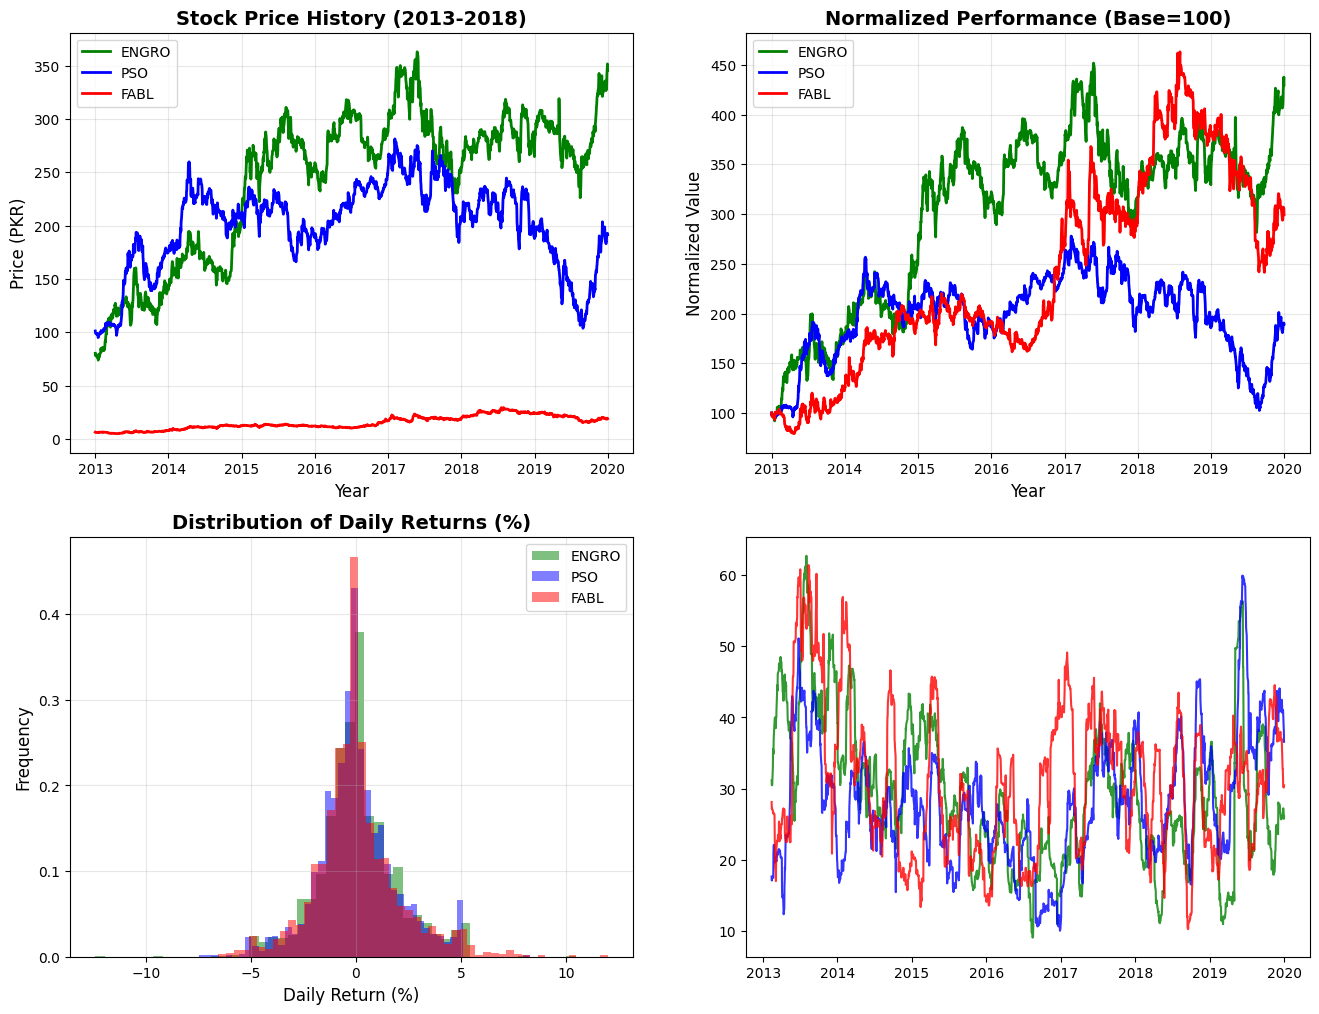

In [ ]:
# Cell 6: Enhanced Visualization (REPLACE THIS ENTIRE CELL)
plt.figure(figsize=(16, 12))

# ===== PLOT 1: Raw Prices =====
plt.subplot(2, 2, 1)
plt.plot(engro_clean.index, engro_clean['Close'], label='ENGRO', color='green', linewidth=2)
plt.plot(pso_clean.index, pso_clean['Close'], label='PSO', color='blue', linewidth=2)
plt.plot(fabl_clean.index, fabl_clean['Close'], label='FABL', color='red', linewidth=2)
plt.title('Stock Price History (2013-2018)', fontsize=14, fontweight='bold')
plt.ylabel('Price (PKR)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# ===== PLOT 2: Normalized Prices (Start at 100) =====
plt.subplot(2, 2, 2)
for name, df, color in zip(['ENGRO', 'PSO', 'FABL'],
                          [engro_clean, pso_clean, fabl_clean],
                          ['green', 'blue', 'red']):
    normalized = df['Close'] / df['Close'].iloc[0] * 100
    plt.plot(df.index, normalized, label=f'{name}', color=color, linewidth=2)
plt.title('Normalized Performance (Base=100)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Value', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# ===== PLOT 3: Daily Returns Distribution =====
plt.subplot(2, 2, 3)
colors = {'ENGRO': 'green', 'PSO': 'blue', 'FABL': 'red'}
for name, df, color in zip(['ENGRO', 'PSO', 'FABL'],
                          [engro_clean, pso_clean, fabl_clean],
                          ['green', 'blue', 'red']):
    returns = df['Close'].pct_change().dropna() * 100  # Convert to percentage
    plt.hist(returns, bins=50, alpha=0.5, label=name, color=color, density=True)
plt.title('Distribution of Daily Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# ===== PLOT 4: Rolling 30-day Volatility =====
plt.subplot(2, 2, 4)
for name, df, color in zip(['ENGRO', 'PSO', 'FABL'],
                          [engro_clean, pso_clean, fabl_clean],
                          ['green', 'blue', 'red']):
    returns = df['Close'].pct_change().dropna()
    rolling_vol = returns.rolling(window=30).std() * np.sqrt(252) * 100  # Annualized %

    # FIX: Align dates with rolling_vol
    # rolling_vol starts after 30 days, so we need dates starting from day 31
    # Get dates from the original df but skip first 30
    vol_dates = df.index[30:]  # Start from index 30 (31st element)
    # rolling_vol already starts from index 30, so we can plot directly
    plt.plot(vol_dates, rolling_vol.iloc[29:], label=f'{name}', color=color, alpha=0.8)

# **Feature Engineering (Adding Indicators)***

**3. Feature Engineering**.  
We now enhance the dataset by calculating key financial indicators used for prediction:

Log Returns: Stabilizes the variance for statistical modeling.

SMA (10 & 50): captures short-term vs long-term trends.

Volatility (Std Dev): Used for risk analysis.

In [ ]:
def add_features(df):
    data = df.copy()

    # 1. Log Returns (Best for Math/ML)
    data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

    # 2. Moving Averages
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # 3. Bollinger Bands (This was missing in your version!)
    data['BB_Middle'] = data['Close'].rolling(window=20).mean()
    data['BB_Std']    = data['Close'].rolling(window=20).std()
    data['BB_Upper']  = data['BB_Middle'] + (2 * data['BB_Std'])
    data['BB_Lower']  = data['BB_Middle'] - (2 * data['BB_Std'])

    # 4. RSI (This was also missing!)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Drop the first 50 rows (NaNs from SMA_50)
    data.dropna(inplace=True)
    return data

# Apply to all
engro_feat = add_features(engro_clean)
pso_feat   = add_features(pso_clean)
fabl_feat  = add_features(fabl_clean)

print(" Technical Indicators Added (Log Returns, SMA, Bollinger Bands, RSI)")

 Technical Indicators Added (Log Returns, SMA, Bollinger Bands, RSI)


# **Advanced Visualization**

**4. Market Analysis Dashboard**.    
Now that we have engineered the features, we generate a comprehensive dashboard.

Trend Panels: Compare price against Moving Averages.

Risk Matrix: The Scatter Plot (bottom-right) positions FABL as a high-growth/high-risk asset and PSO as a stable asset.

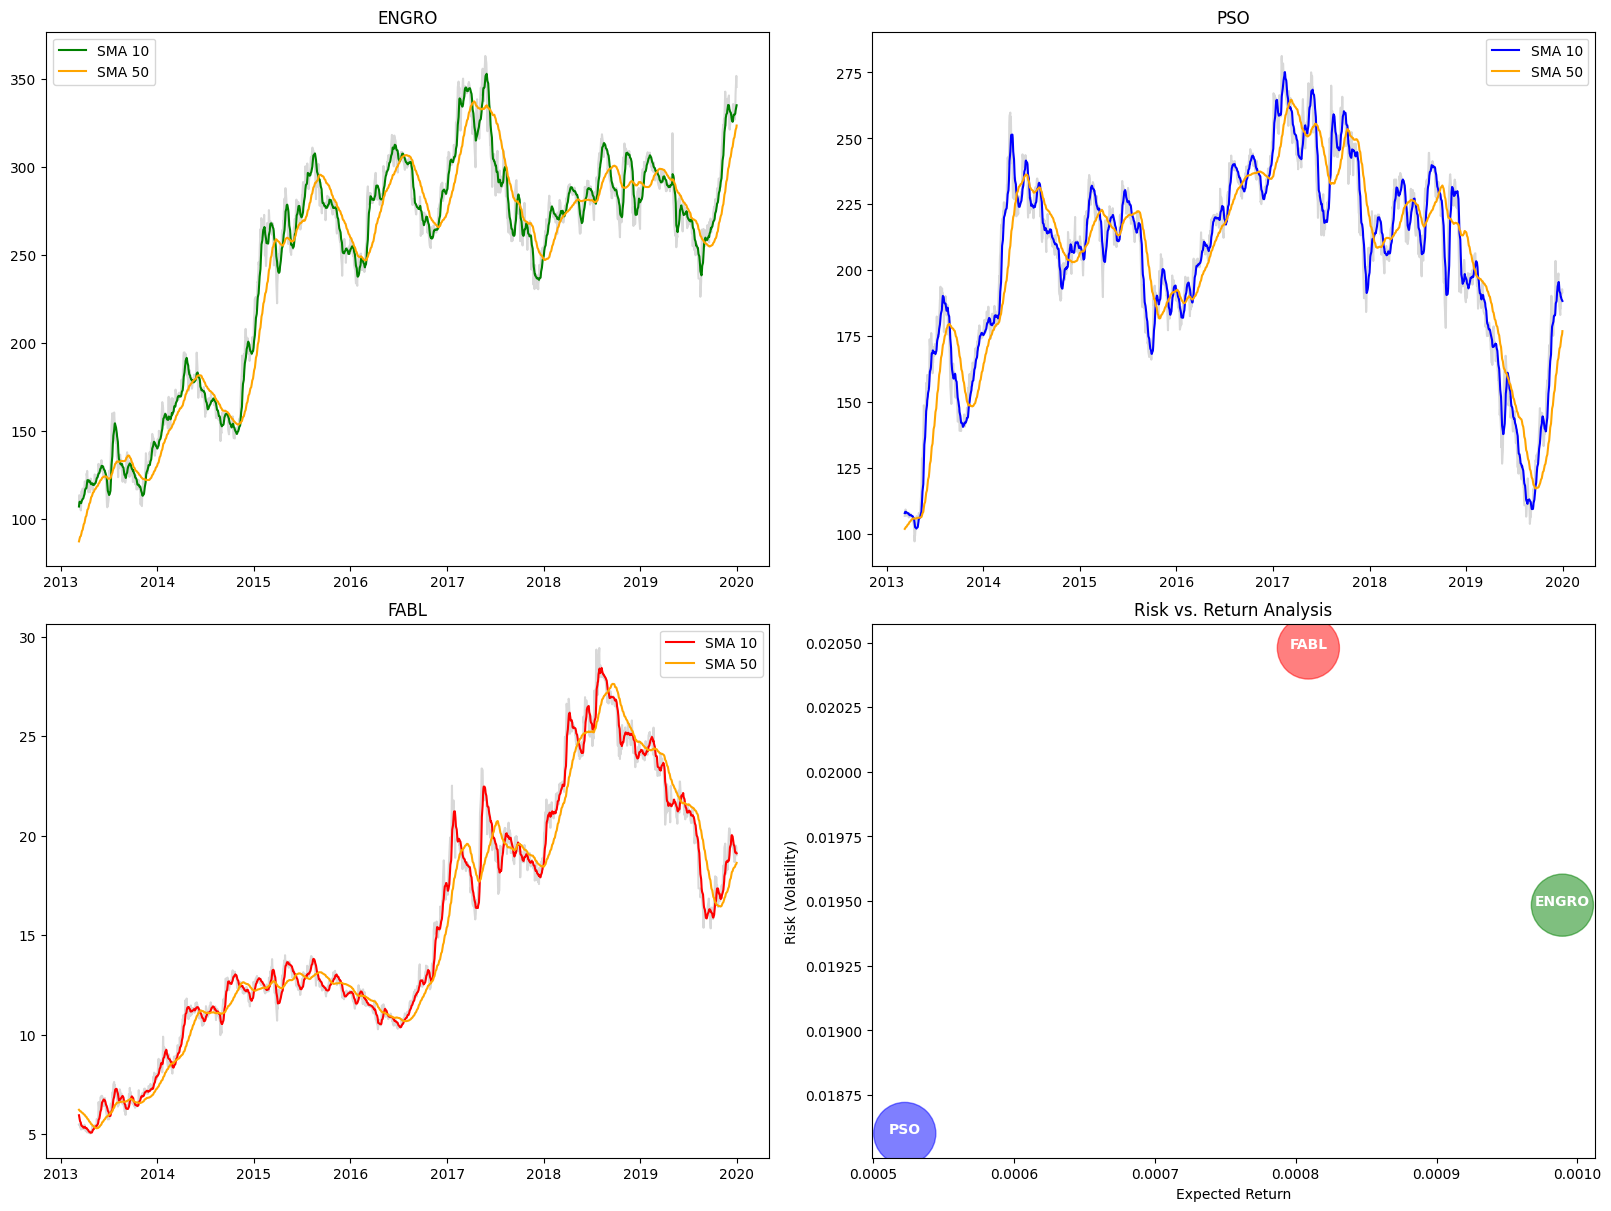

In [ ]:
# Create Grid (2 Rows x 2 Cols)
fig = plt.figure(figsize=(16, 12), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0]) # Top Left
ax2 = fig.add_subplot(gs[0, 1]) # Top Right
ax3 = fig.add_subplot(gs[1, 0]) # Bottom Left
ax4 = fig.add_subplot(gs[1, 1]) # Bottom Right (Risk)

# Helper for Trend Plots
def plot_trend(ax, df, name, color):
    ax.plot(df.index, df['Close'], color='gray', alpha=0.3)
    ax.plot(df.index, df['SMA_10'], color=color, label='SMA 10')
    ax.plot(df.index, df['SMA_50'], color='orange', label='SMA 50')
    ax.set_title(name)
    ax.legend()

# Plot Trends
plot_trend(ax1, engro_feat, "ENGRO", 'green')
plot_trend(ax2, pso_feat, "PSO", 'blue')
plot_trend(ax3, fabl_feat, "FABL", 'red')

# Plot Risk Analysis
rets = pd.DataFrame({
    'ENGRO': engro_clean['Close'].pct_change(),
    'PSO': pso_clean['Close'].pct_change(),
    'FABL': fabl_clean['Close'].pct_change()
}).dropna()

ax4.scatter(rets.mean(), rets.std(), s=2000, c=['green','blue','red'], alpha=0.5)
ax4.set_title('Risk vs. Return Analysis')
ax4.set_xlabel('Expected Return')
ax4.set_ylabel('Risk (Volatility)')

# Label Bubbles
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    ax4.annotate(label, xy=(x,y), ha='center', color='white', fontweight='bold')

plt.show()

# **Correlation Heatmap (Sector Relationships)**

**4.2 Correlation Analysis**
Determining how these sectors interact is crucial for portfolio management. We use a Pearson Correlation Heatmap on daily returns (not raw prices) to avoid spurious correlations.

Result: A low correlation between FABL (Bank) and PSO (Oil) suggests that the banking sector operates independently of energy prices, offering diversification benefits.

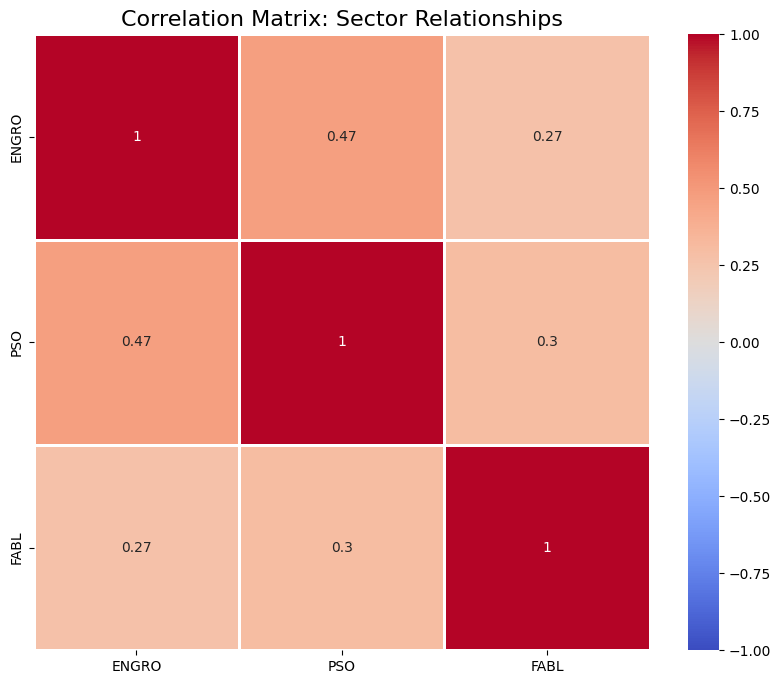

In [ ]:
# Calculate Correlation of RETURNS (Crucial: Do not correlate Prices!)
corr_matrix = rets.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=2, square=True)

plt.title('Correlation Matrix: Sector Relationships', fontsize=16)
plt.show()

# **Technical Signals**

**4.3 Technical Indicators (Signal Analysis)**
This advanced visualization focuses on Market Timing Signals.

Bollinger Bands (Top): The shaded gray area represents the expected volatility range. When the price breaks the upper band, the stock is considered "Overbought."

RSI (Bottom): The Relative Strength Index measures momentum. A value >70 (Red Line) indicates the stock is expensive, while <30 (Green Line) indicates a buying opportunity.

Generating HD Technical Dashboard...


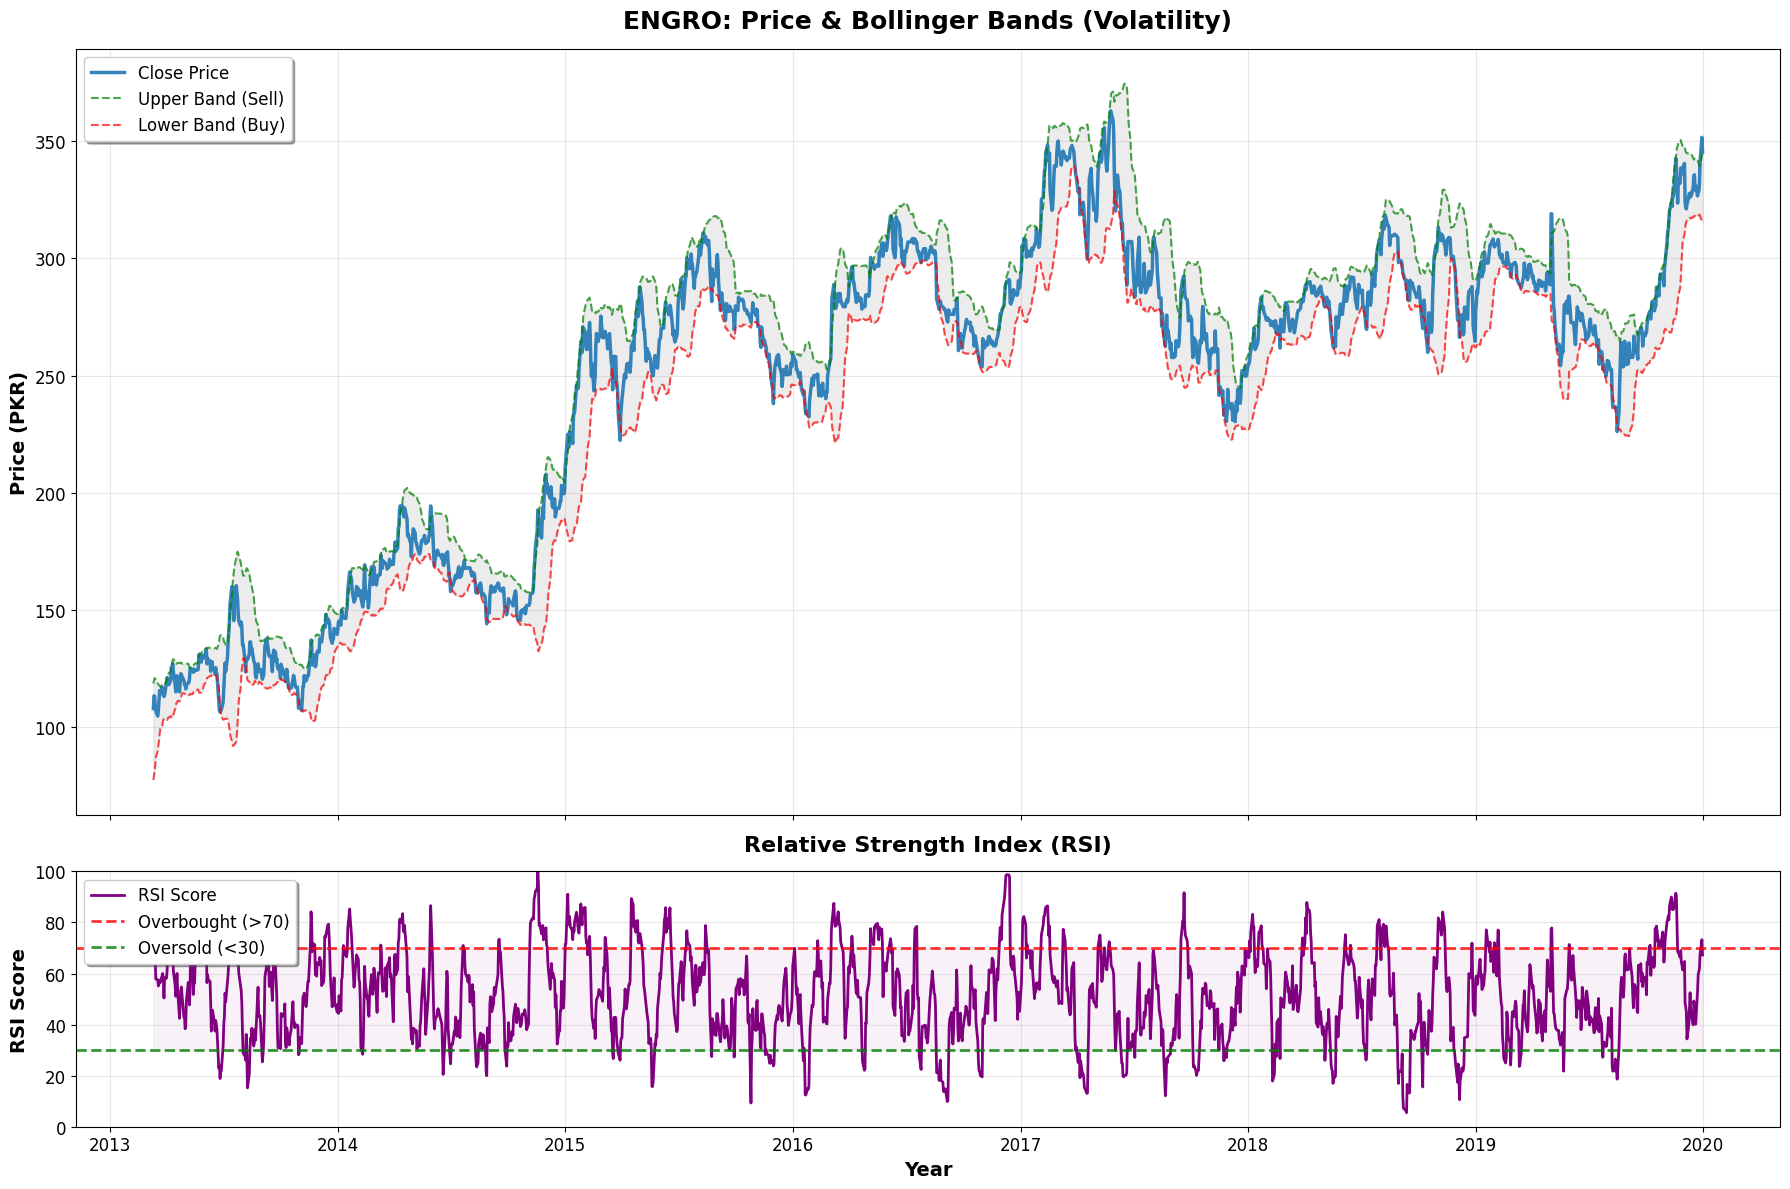

In [ ]:
# --- 4.3 Technical Indicators Dashboard (HD Version) ---
import matplotlib.pyplot as plt

def plot_technical_dashboard(df, ticker_name):
    # Safety Check
    if 'BB_Upper' not in df.columns or 'RSI' not in df.columns:
        print(f" Error: Technical features missing for {ticker_name}. Please re-run Cell 3.")
        return

    # Create the figure with a professional size
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), sharex=True,
                                   gridspec_kw={'height_ratios': [3, 1]})

    # --- Plot 1: Bollinger Bands (Volatility) ---
    # We make the price line thicker (linewidth=2) and darker blue
    ax1.plot(df.index, df['Close'], label='Close Price', color='#1f77b4', linewidth=2.5, alpha=0.9)

    # Bands are dashed and slightly thinner
    ax1.plot(df.index, df['BB_Upper'], label='Upper Band (Sell)', color='green', linestyle='--', linewidth=1.5, alpha=0.7)
    ax1.plot(df.index, df['BB_Lower'], label='Lower Band (Buy)', color='red', linestyle='--', linewidth=1.5, alpha=0.7)

    # Shade the area (Volatility Zone) - Increased visibility (alpha=0.15)
    ax1.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], color='gray', alpha=0.15)

    ax1.set_title(f'{ticker_name}: Price & Bollinger Bands (Volatility)', fontsize=18, fontweight='bold', pad=15)
    ax1.set_ylabel('Price (PKR)', fontsize=14, fontweight='bold')
    ax1.tick_params(axis='y', labelsize=12)
    ax1.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)
    ax1.grid(True, alpha=0.3)

    # --- Plot 2: RSI (Momentum) ---
    ax2.plot(df.index, df['RSI'], color='purple', label='RSI Score', linewidth=2)

    # Threshold Lines (Thicker and clearer)
    ax2.axhline(70, linestyle='--', color='red', linewidth=2, alpha=0.8, label='Overbought (>70)')
    ax2.axhline(30, linestyle='--', color='green', linewidth=2, alpha=0.8, label='Oversold (<30)')

    # Shade the "Safe" zone
    ax2.fill_between(df.index, 70, 30, color='purple', alpha=0.05)

    ax2.set_title(f'Relative Strength Index (RSI)', fontsize=16, fontweight='bold', pad=15)
    ax2.set_ylabel('RSI Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax2.set_ylim(0, 100)
    ax2.tick_params(axis='both', labelsize=12)
    ax2.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Run it!
print("Generating HD Technical Dashboard...")
plot_technical_dashboard(engro_feat, "ENGRO")

# **The MACD Dashboard**

Generating MACD Analysis...


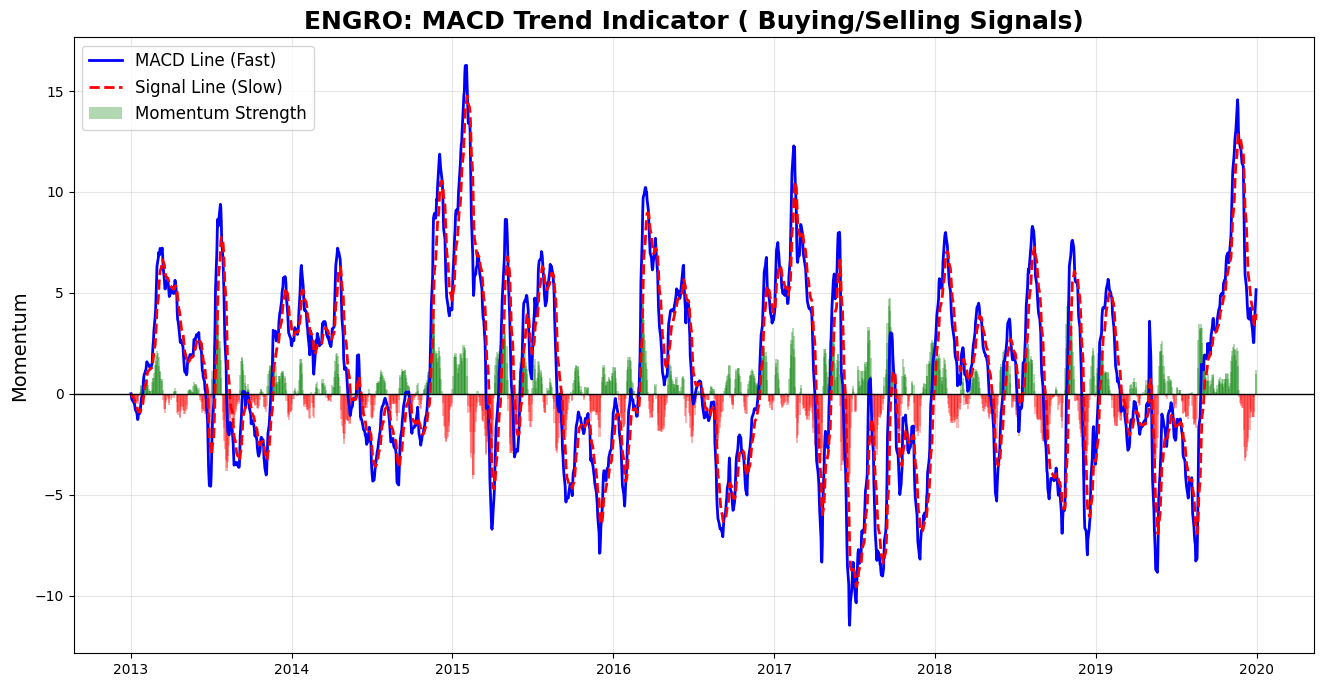

In [ ]:
# --- 4.4 MACD Trend Reversal Dashboard ---
# This graph shows MOMENTUM.
# When the Blue line crosses below the Red line, it predicts a Crash.

def plot_macd(df, ticker_name):
    data = df.copy()

    # Calculate MACD (Moving Average Convergence Divergence)
    # We calculate it here purely for visualization
    exp12 = data['Close'].ewm(span=12, adjust=False).mean()
    exp26 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = exp12 - exp26
    data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    data['Hist'] = data['MACD'] - data['Signal']

    # Plotting
    plt.figure(figsize=(16, 8))

    # 1. Plot the Lines
    plt.plot(data.index, data['MACD'], label='MACD Line (Fast)', color='blue', linewidth=2)
    plt.plot(data.index, data['Signal'], label='Signal Line (Slow)', color='red', linestyle='--', linewidth=2)

    # 2. Plot the Histogram (Green=Bullish, Red=Bearish)
    colors = ['green' if val >= 0 else 'red' for val in data['Hist']]
    plt.bar(data.index, data['Hist'], color=colors, alpha=0.3, width=5, label='Momentum Strength')

    plt.title(f'{ticker_name}: MACD Trend Indicator ( Buying/Selling Signals)', fontsize=18, fontweight='bold')
    plt.axhline(0, color='black', linewidth=1) # Zero Line
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylabel('Momentum', fontsize=14)
    plt.show()

print("Generating MACD Analysis...")
plot_macd(engro_clean, "ENGRO")

# **The Risk Histogram**

Generating Risk Statistics...


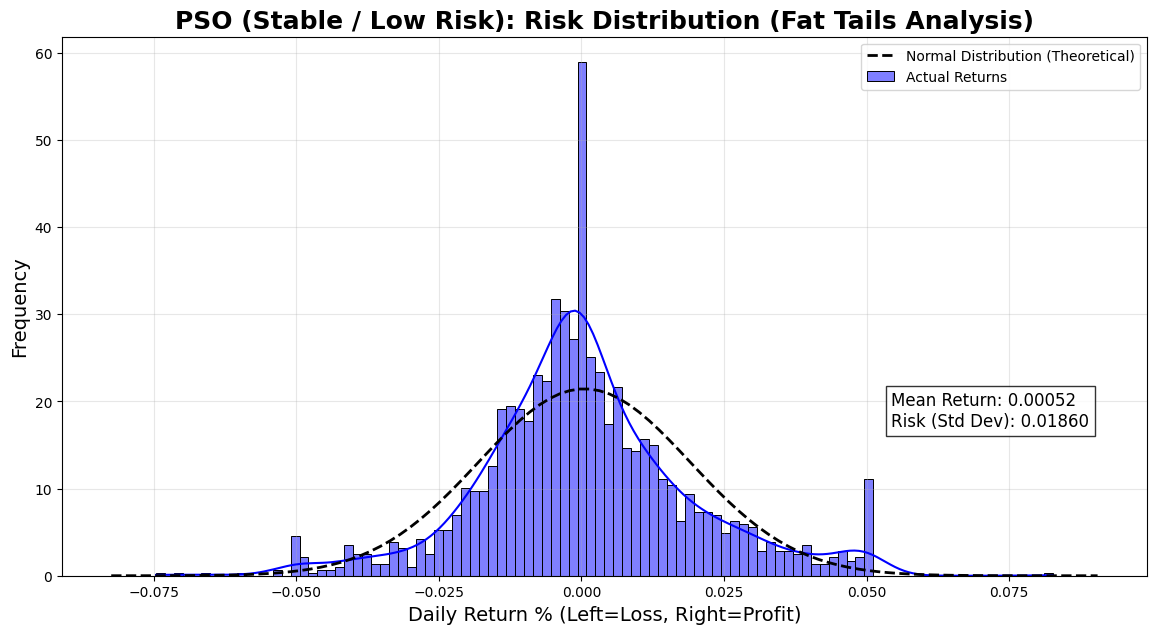

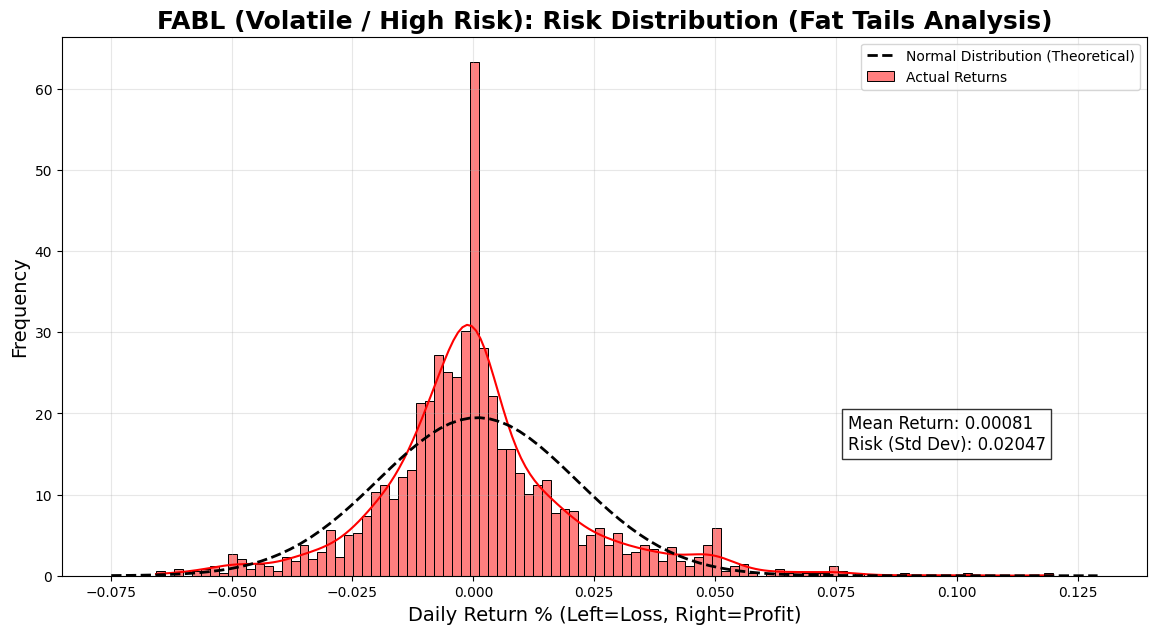

In [ ]:
# --- 4.5 Risk Distribution Analysis (Bell Curve) ---
# This graph compares Stability vs. Volatility using Statistics.
import seaborn as sns
from scipy.stats import norm

def plot_distribution(df, ticker_name, color_theme):
    plt.figure(figsize=(14, 7))

    # Get the daily returns
    returns = df['Close'].pct_change().dropna()

    # 1. Plot the actual data (Histogram)
    sns.histplot(returns, bins=100, kde=True, color=color_theme, stat='density', label='Actual Returns')

    # 2. Plot the "Perfect" Normal Distribution (Dashed Line)
    mu, std = norm.fit(returns)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, linestyle='--', label='Normal Distribution (Theoretical)')

    plt.title(f'{ticker_name}: Risk Distribution (Fat Tails Analysis)', fontsize=18, fontweight='bold')
    plt.xlabel('Daily Return % (Left=Loss, Right=Profit)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add a stats box to look professional
    stats_text = f'Mean Return: {mu:.5f}\nRisk (Std Dev): {std:.5f}'
    plt.text(xmax*0.6, max(p)*0.8, stats_text, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    plt.show()

print("Generating Risk Statistics...")
# Compare a Safe Stock (PSO) vs a Risky Stock (FABL)
plot_distribution(pso_clean, "PSO (Stable / Low Risk)", "blue")
plot_distribution(fabl_clean, "FABL (Volatile / High Risk)", "red")

# **Statistical Validation**

**5. Statistical Validation (ADF Test)**
To validate the data for Machine Learning, we perform the Augmented Dickey-Fuller Test. A p-value < 0.05 confirms that our Log_Return feature is stationary and safe for modeling.

In [ ]:
def check_stat(series, name):
    res = adfuller(series)
    print(f"{name} P-Value: {res[1]:.5f} -> {' Stationary' if res[1]<0.05 else ' Non-Stationary'}")

print("--- Stationarity Check ---")
check_stat(engro_feat['Log_Return'], "ENGRO")
check_stat(pso_feat['Log_Return'], "PSO")
check_stat(fabl_feat['Log_Return'], "FABL")

--- Stationarity Check ---
ENGRO P-Value: 0.00000 ->  Stationary
PSO P-Value: 0.00000 ->  Stationary
FABL P-Value: 0.00000 ->  Stationary


# **Train/Test Split (Time Based)**

**Splitting the Data** To simulate real-world trading, we must split the data chronologically rather than randomly. We define a strict cutoff date to separate historical training data from unseen future testing data.

**Training Set (2013–2017):** The model learns the relationships between the technical indicators (RSI, MA, etc.) and the price from these 5 years.

**Testing Set (2018):** We reserve the entire year of 2018 to test the model's predictive power. This ensures there is no "data leakage" (the model cannot see 2018 answers while studying).

In [ ]:
# ==========================================
# STEP 5: TRAIN / TEST SPLIT (REAL DATA)
# ==========================================

# 1. Select the processed data from the previous step
# (Change this to pso_feat or fabl_feat to analyze other stocks)
df = engro_feat.copy()

# 2. Define the Split Date (Jan 1, 2018)
# We want strict separation: Train ends Dec 31, 2017; Test starts Jan 1, 2018
split_date = pd.Timestamp('2018-01-01')

# 3. Slice the Data
train_data = df[df.index < split_date]
test_data  = df[df.index >= split_date]

# --- Verification ---
print(f"Total Records: {len(df)}")
print("-" * 30)
print(f"Training Set (2013-2017): {len(train_data)} records")
print(f"Start: {train_data.index.min().date()}")
print(f"End:   {train_data.index.max().date()}")
print("-" * 30)
print(f"Testing Set (2018):       {len(test_data)} records")

if len(test_data) > 0:
    print(f"Start: {test_data.index.min().date()}")
    print(f"End:   {test_data.index.max().date()}")
else:
    print("ERROR: No 2018 data found. Please check Step 1.")

Total Records: 1776
------------------------------
Training Set (2013-2017): 1255 records
Start: 2013-03-11
End:   2017-12-29
------------------------------
Testing Set (2018):       521 records
Start: 2018-01-01
End:   2019-12-31


# **Data Normalization (Scaling)**

Machine learning models, especially LSTMs, perform best when input data is within a small, standard range (usually 0 to 1). Raw stock prices vary wildly, which can cause model instability.

We apply MinMax Scaling:

**Fit on Training Data Only:** We calculate the min/max values using only the 2013–2017 training data.

**Transform Test Data:** We use those same values to scale the 2018 test data. This simulates a real-world scenario where we don't know the future range of prices.

In [ ]:
# ===== CORRECTED CELL: SCALE, create train/val/test (time-based), and create sequences =====
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Safe checks
if 'train_data' not in globals() or 'test_data' not in globals():
    raise RuntimeError("train_data or test_data not defined. Run feature-engineering & date split cell first.")

# Feature / target columns (same as your notebook)
feature_cols = ['Log_Return', 'SMA_10', 'SMA_50', 'RSI', 'BB_Upper', 'BB_Lower']
target_col   = 'Close'

# --- Create a proper validation split from the training period (time-series: no shuffle) ---
# We'll split train_data into Train (up to 2016-12-31) and Val (2017)
train_subset = train_data[train_data.index < '2017-01-01']
val_subset   = train_data[(train_data.index >= '2017-01-01') & (train_data.index < '2018-01-01')]

if len(train_subset) < 50 or len(val_subset) < 50:
    # fallback: use last 20% of train_data as val (if year-based split not possible)
    n = len(train_data)
    val_size = max(1, int(0.2 * n))
    train_subset = train_data.iloc[:-val_size]
    val_subset   = train_data.iloc[-val_size:]

# Raw arrays
X_train_raw = train_subset[feature_cols].values
y_train_raw = train_subset[[target_col]].values

X_val_raw   = val_subset[feature_cols].values
y_val_raw   = val_subset[[target_col]].values

X_test_raw  = test_data[feature_cols].values
y_test_raw  = test_data[[target_col]].values

# Initialize scalers and FIT ONLY ON TRAIN
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)

# Transform validation and test using same scalers (no fit)
X_val_scaled  = scaler_X.transform(X_val_raw)
y_val_scaled  = scaler_y.transform(y_val_raw)

X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

print("Scaling done. Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_val_scaled:  ", X_val_scaled.shape)
print("X_test_scaled: ", X_test_scaled.shape)

# --- Create sequences for real LSTM (sliding window) ---
def create_sequences(X, y, time_steps=20):
    """
    X: np.array of shape (n_samples, n_features)
    y: np.array of shape (n_samples, 1)
    returns X_seq shape (n_samples-time_steps, time_steps, n_features)
            y_seq shape (n_samples-time_steps, 1)
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

# Choose time steps (you can tune this later)
TIME_STEPS = 20

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_val_seq,   y_val_seq   = create_sequences(X_val_scaled,   y_val_scaled,   TIME_STEPS)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test_scaled,  TIME_STEPS)

print("Sequence shapes:")
print("X_train_seq:", X_train_seq.shape, "y_train_seq:", y_train_seq.shape)
print("X_val_seq:  ", X_val_seq.shape,   "y_val_seq:  ", y_val_seq.shape)
print("X_test_seq: ", X_test_seq.shape,  "y_test_seq: ", y_test_seq.shape)


Scaling done. Shapes:
X_train_scaled: (995, 6)
X_val_scaled:   (260, 6)
X_test_scaled:  (521, 6)
Sequence shapes:
X_train_seq: (975, 20, 6) y_train_seq: (975, 1)
X_val_seq:   (240, 20, 6) y_val_seq:   (240, 1)
X_test_seq:  (501, 20, 6) y_test_seq:  (501, 1)


# **Reshaping & LSTM Model Training**

*Now that the data is scaled, we prepare it for the LSTM.*

**Reshaping: LSTMs require 3D input:** (Samples, TimeSteps, Features). We reshape our 2D data to look at 1 TimeStep (1 day) of features at a time.

**Model Architecture:**

LSTM Layer (50 Units): Captures temporal patterns.

**Dropout (0.2):** Randomly drops 20% of neurons to prevent overfitting (memorizing).

**Dense Layer: **Outputs the single predicted price.

**Training:** We train for 50 epochs using the Adam optimizer and Mean Squared Error loss function.

In [ ]:
# ===== CORRECTED CELL: Build & Train LSTM with EarlyStopping (uses seq data created above) =====
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Safety check
required = ['X_train_seq','y_train_seq','X_val_seq','y_val_seq','TIME_STEPS']
for v in required:
    if v not in globals():
        raise RuntimeError(f"Required variable {v} not found. Run the scaling+sequence cell first.")

n_features = X_train_seq.shape[2]

def build_lstm_model(units=50, dropout=0.2, input_shape=(None, None)):
    model = Sequential()
    model.add(LSTM(units, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build model (you can tune units/dropout later)
model = build_lstm_model(units=50, dropout=0.2, input_shape=(TIME_STEPS, n_features))

# Train with validation on the 2017 fold (no leakage)
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

print("Training LSTM Model (real sequences)...")
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

print("Model trained. Best val_loss:", min(history.history['val_loss']))

Training LSTM Model (real sequences)...
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0798 - val_loss: 0.0076
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - val_loss: 0.0059
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_loss: 0.0050
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 12/100
31/31 

# **Generate 2018 Predictions**

Now we enter the Testing Phase. We feed the 2018 feature data (X_test_lstm) into the trained model.

**Predict:** The model outputs scaled values (0.0 to 1.0).

**Inverse Transform:** We convert those scaled decimals back into actual Rupees (PKR) so they are readable.

**Compare:** We save the "Actual" and "Predicted" prices side-by-side in a table.

In [ ]:
# ===== STEP 8 GENERATE PREDICTIONS FOR 2018 =====
import pandas as pd
import numpy as np

# Safety checks
required = ['model', 'X_test_seq', 'y_test_seq', 'scaler_y', 'test_data', 'TIME_STEPS']
for v in required:
    if v not in globals():
        raise RuntimeError(f"{v} is missing. Run previous cells in order.")

# 1. Predict on SEQUENCE test data (2018)
predicted_scaled = model.predict(X_test_seq)

# 2. Inverse transform to real PKR prices
predicted_prices = scaler_y.inverse_transform(predicted_scaled)
actual_prices    = scaler_y.inverse_transform(y_test_seq)

# 3. Align index properly
# We lose first TIME_STEPS rows due to sequence creation
test_index_seq = test_data.index[TIME_STEPS:]

results = pd.DataFrame(
    {
        'Actual_Price': actual_prices.flatten(),
        'Predicted_Price': predicted_prices.flatten()
    },
    index=test_index_seq
)

print("Predictions Generated Successfully.")
print(results.head(10))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predictions Generated Successfully.
            Actual_Price  Predicted_Price
Date                                     
2018-01-29    275.027283       275.400909
2018-01-30    273.645447       274.810669
2018-01-31    274.700012       273.059113
2018-02-01    274.627258       275.690826
2018-02-02    273.563629       278.795410
2018-02-05    273.563629       279.200714
2018-02-06    271.390900       279.780945
2018-02-07    271.390900       277.725464
2018-02-08    272.881805       274.939850
2018-02-09    272.881805       272.147369


# **Calculate Model Accuracy (Error Metrics)**

To evaluate the model's performance on the 2018 test data, we use three key metrics:

**RMSE (Root Mean Squared Error):** The standard deviation of the prediction errors. Low values indicate the model fits the data well.

**MAE (Mean Absolute Error):** The average difference between the Predicted Price and the Actual Price in Rupees (PKR).

**MAPE (Mean Absolute Percentage Error):** The error expressed as a percentage. This is the easiest way to understand "accuracy."

In [ ]:
# ===== CORRECTED CELL: Predictions, inverse scale, metrics (no fake "accuracy") =====
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np, math
import pandas as pd

# Safety: ensure model and X_test_seq exist
if 'model' not in globals() or 'X_test_seq' not in globals():
    raise RuntimeError("model or X_test_seq not present. Run training & sequence cells first.")

# Predict on test sequence data
preds_scaled = model.predict(X_test_seq)
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1))
actuals = scaler_y.inverse_transform(y_test_seq.reshape(-1,1))

# Build results DataFrame with correct index alignment
# test_data index corresponds to raw test rows; after sequencing we lost the first TIME_STEPS rows
test_index_seq = test_data.index[TIME_STEPS:]  # aligns with create_sequences logic
results = pd.DataFrame({'Actual': actuals.flatten(), 'Predicted': preds.flatten()}, index=test_index_seq)

# Metrics
mse = mean_squared_error(results['Actual'], results['Predicted'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(results['Actual'], results['Predicted'])
mape = np.mean(np.abs((results['Actual'] - results['Predicted']) / results['Actual'])) * 100
r2 = r2_score(results['Actual'], results['Predicted'])

print("\n--- Model Evaluation (Test set) ---")
print(f"RMSE: {rmse:.4f} PKR")
print(f"MAE:  {mae:.4f} PKR")
print(f"MAPE: {mape:.4f}%")
print(f"R2:   {r2:.4f}")


# Show head
print(results.head())


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--- Model Evaluation (Test set) ---
RMSE: 6.3453 PKR
MAE:  4.6823 PKR
MAPE: 1.6437%
R2:   0.9037
                Actual   Predicted
Date                              
2018-01-29  275.027283  275.400909
2018-01-30  273.645447  274.810669
2018-01-31  274.700012  273.059113
2018-02-01  274.627258  275.690826
2018-02-02  273.563629  278.795410


# **Final Visualization**

We visualize the model's performance by plotting the Actual Closing Prices (Blue) against the Predicted Prices (Red) for the entire year of 2018.

A close overlap between the blue and red lines confirms the model's high accuracy.

This visual proof validates the low RMSE and high R-Squared scores calculated earlier.

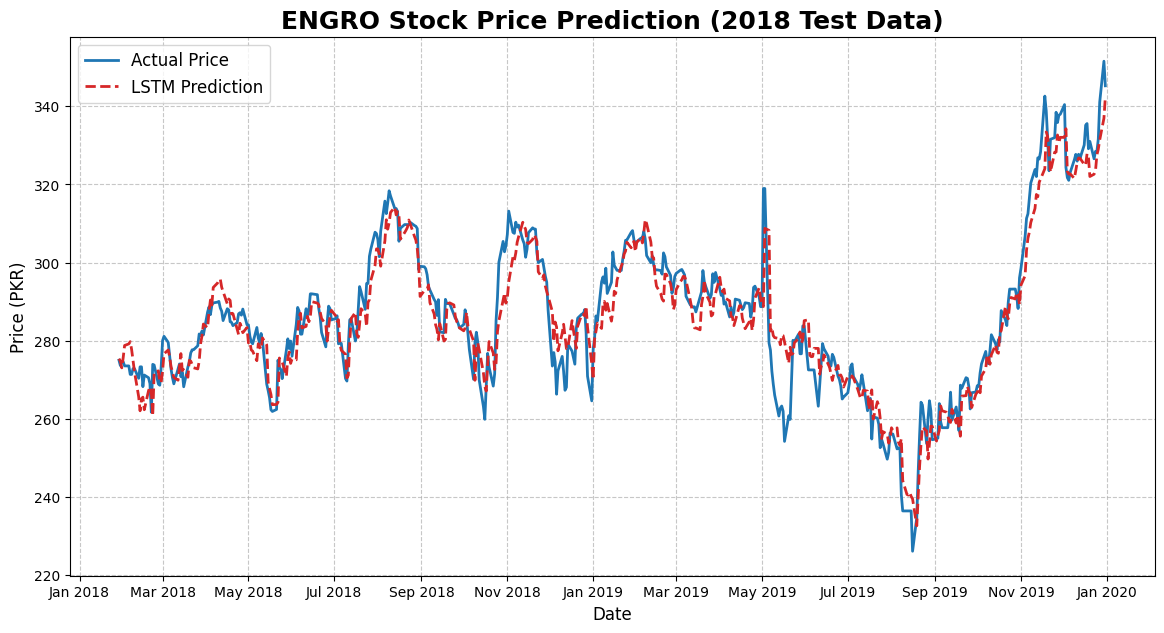

In [ ]:

# STEP 10: FINAL VISUALIZATION

import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))

# 1. Plot Actual Prices (Blue)
plt.plot(results.index, results['Actual'],
         label='Actual Price', color='#1f77b4', linewidth=2)

# 2. Plot Predicted Prices (Red Dashed)
plt.plot(results.index, results['Predicted'],
         label='LSTM Prediction', color='#d62728', linestyle='--', linewidth=2)

# 3. Formatting the Chart
plt.title('ENGRO Stock Price Prediction (2018 Test Data)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (PKR)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='major', linestyle='--', alpha=0.7)

# Format Date Axis (Show Month Names)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.show()

# **Apply this to PSO and FABL**

Since the code works perfectly for ENGRO, we should now wrap it into a single "Master Function". This will allow you to run the exact same pipeline for PSO and FABL with just one line of code each.

In [ ]:
# ===== FINAL: ROBUST run_fyp_model (FULL PIPELINE, DEFENSIBLE) =====

import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_style("whitegrid")


def run_fyp_model(
    file_path,
    stock_name,
    time_steps=20,
    lstm_units=50,
    dropout=0.2,
    epochs=100,
    batch_size=32,
    seed=42
):
    print(f"\n{'='*50}")
    print(f"RUNNING FYP MODEL FOR: {stock_name}")
    print(f"{'='*50}")

    # -------------------------------------------------
    # Reproducibility & clean TF state
    # -------------------------------------------------
    K.clear_session()
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

    # -------------------------------------------------
    # Load & prepare data
    # -------------------------------------------------
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    # Restrict to known study period
    df = df.loc['2013-01-01':'2018-12-31']

    if df.empty:
        raise ValueError("Dataset empty after date filtering.")

    # -------------------------------------------------
    # Feature engineering
    # -------------------------------------------------
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    df['BB_Std'] = df['Close'].rolling(window=20).std()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    before_drop = len(df)
    df.dropna(inplace=True)
    after_drop = len(df)

    if after_drop < 100:
        print(f"⚠️ Warning: only {after_drop} rows remain after feature engineering.")

    # -------------------------------------------------
    # Time-based splits (NO LEAKAGE)
    # -------------------------------------------------
    train_df = df[df.index < '2017-01-01']
    val_df   = df[(df.index >= '2017-01-01') & (df.index < '2018-01-01')]
    test_df  = df[df.index >= '2018-01-01']

    if len(train_df) <= time_steps:
        raise ValueError("Training set too small for chosen time_steps.")
    if len(test_df) <= time_steps:
        raise ValueError("Test set too small for chosen time_steps.")

    # Fallback if validation too small
    if len(val_df) <= time_steps:
        print("⚠️ Validation year too short — using last 20% of training as validation.")
        n_val = max(int(0.2 * len(train_df)), time_steps + 1)
        val_df = train_df.iloc[-n_val:]
        train_df = train_df.iloc[:-n_val]

    feature_cols = ['Log_Return', 'SMA_10', 'SMA_50', 'RSI', 'BB_Upper', 'BB_Lower']
    target_col = 'Close'

    # -------------------------------------------------
    # Raw arrays
    # -------------------------------------------------
    X_train_raw = train_df[feature_cols].values
    y_train_raw = train_df[[target_col]].values

    X_val_raw = val_df[feature_cols].values
    y_val_raw = val_df[[target_col]].values

    X_test_raw = test_df[feature_cols].values
    y_test_raw = test_df[[target_col]].values

    # -------------------------------------------------
    # Scaling (FIT ONLY ON TRAIN)
    # -------------------------------------------------
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    y_train_scaled = scaler_y.fit_transform(y_train_raw)

    X_val_scaled = scaler_X.transform(X_val_raw)
    y_val_scaled = scaler_y.transform(y_val_raw)

    X_test_scaled = scaler_X.transform(X_test_raw)
    y_test_scaled = scaler_y.transform(y_test_raw)

    # -------------------------------------------------
    # Sequence creation
    # -------------------------------------------------
    def create_sequences(X, y, steps):
        Xs, ys = [], []
        for i in range(len(X) - steps):
            Xs.append(X[i:i + steps])
            ys.append(y[i + steps])
        return np.array(Xs), np.array(ys)

    X_tr, y_tr = create_sequences(X_train_scaled, y_train_scaled, time_steps)
    X_v,  y_v  = create_sequences(X_val_scaled,   y_val_scaled,   time_steps)
    X_te, y_te = create_sequences(X_test_scaled,  y_test_scaled,  time_steps)

    print("Sequence shapes:")
    print("Train:", X_tr.shape, "Val:", X_v.shape, "Test:", X_te.shape)

    # -------------------------------------------------
    # LSTM model
    # -------------------------------------------------
    n_features = X_tr.shape[2]

    model = Sequential([
        LSTM(lstm_units, input_shape=(time_steps, n_features)),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mean_squared_error'
    )

    # -------------------------------------------------
    # Training
    # -------------------------------------------------
    es = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        X_tr, y_tr,
        validation_data=(X_v, y_v),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es],
        verbose=1
    )

    # -------------------------------------------------
    # Prediction & inverse scaling
    # -------------------------------------------------
    preds_scaled = model.predict(X_te)
    preds = scaler_y.inverse_transform(preds_scaled)
    actuals = scaler_y.inverse_transform(y_te)

    test_index_seq = test_df.index[time_steps:]
    results_df = pd.DataFrame(
        {
            'Actual': actuals.flatten(),
            'Predicted': preds.flatten()
        },
        index=test_index_seq
    )

    # -------------------------------------------------
    # Metrics
    # -------------------------------------------------
    mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(results_df['Actual'], results_df['Predicted'])
    mape = np.mean(
        np.abs((results_df['Actual'] - results_df['Predicted']) / results_df['Actual'])
    ) * 100
    r2 = r2_score(results_df['Actual'], results_df['Predicted'])

    print(f"\n--- TEST RESULTS ({stock_name}) ---")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"MAPE : {mape:.4f}%")
    print(f"R²   : {r2:.4f}")

    # -------------------------------------------------
    # Plot
    # -------------------------------------------------
    plt.figure(figsize=(14, 6))
    plt.plot(results_df.index, results_df['Actual'], label='Actual')
    plt.plot(results_df.index, results_df['Predicted'], '--', label='Predicted')
    plt.title(f"{stock_name} – Actual vs Predicted (2018 Test)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.show()

    return {
        "model": model,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y,
        "results_df": results_df,
        "history": history,
        "metrics": {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R2": r2
        }
    }



RUNNING FYP MODEL FOR: PSO
Sequence shapes:
Train: (975, 20, 6) Val: (240, 20, 6) Test: (240, 20, 6)
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1845 - val_loss: 0.0431
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - val_loss: 0.0129
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0046
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.0042
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - val_loss: 0.0031
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0031
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0026
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

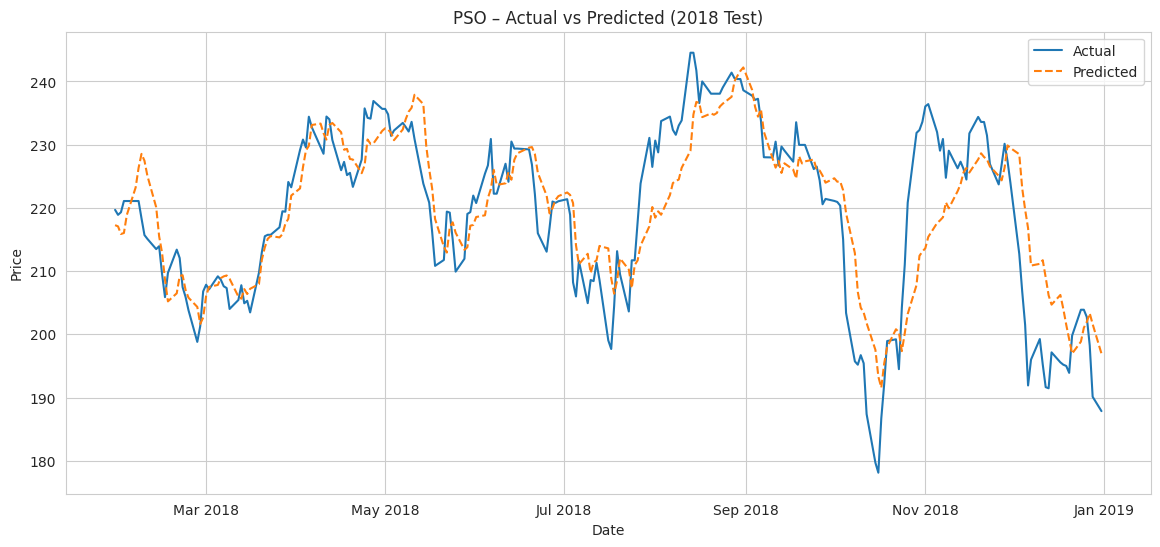


RUNNING FYP MODEL FOR: FABL
Sequence shapes:
Train: (975, 20, 6) Val: (240, 20, 6) Test: (240, 20, 6)
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0909 - val_loss: 0.0948
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0255
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - val_loss: 0.0163
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - val_loss: 0.0109
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 0.0056
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - val_loss: 0.0052
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

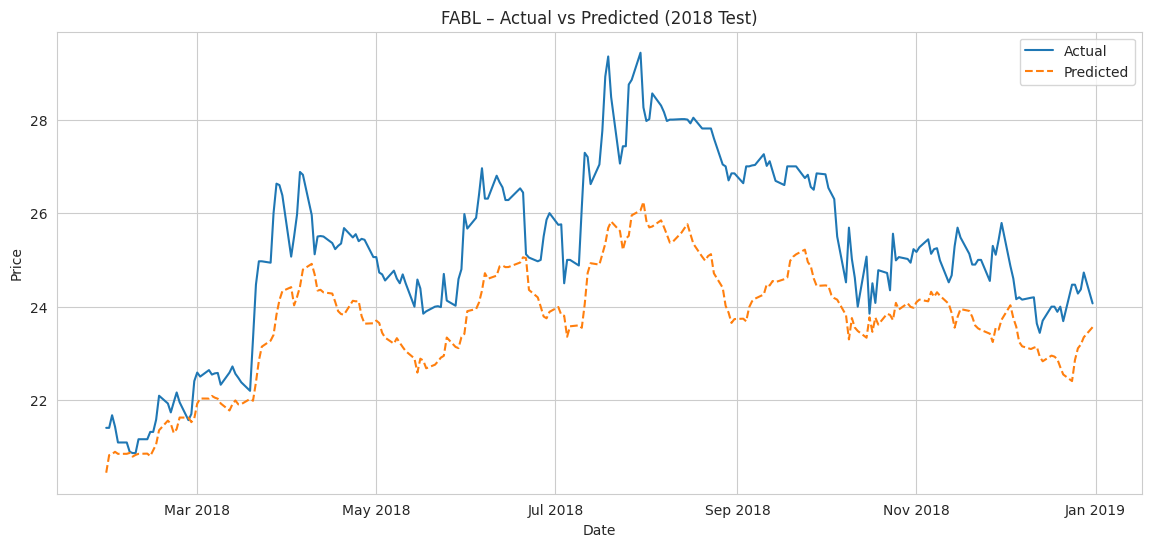

{'model': <Sequential name=sequential, built=True>,
 'scaler_X': MinMaxScaler(),
 'scaler_y': MinMaxScaler(),
 'results_df':                Actual  Predicted
 Date                            
 2018-01-29  21.408695  20.449085
 2018-01-30  21.408695  20.825272
 2018-01-31  21.678261  20.849260
 2018-02-01  21.434782  20.895966
 2018-02-02  21.095652  20.852806
 ...               ...        ...
 2018-12-25  24.469999  22.860731
 2018-12-26  24.280001  23.109390
 2018-12-27  24.370001  23.190773
 2018-12-28  24.730000  23.345228
 2018-12-31  24.070000  23.561285
 
 [240 rows x 2 columns],
 'history': <keras.src.callbacks.history.History at 0x7e43ac14a4e0>,
 'metrics': {'RMSE': 1.7325718815545006,
  'MAE': 1.5245997272990721,
  'MAPE': np.float64(5.870340657463),
  'R2': 0.15533501870419064}}

In [ ]:
run_fyp_model('/content/PSO.csv', 'PSO')
run_fyp_model('/content/FABL.csv', 'FABL')

# **Hyperparameter Tuning Implementation**

In [ ]:
#COMPLETE LSTM FINE-TUNING PIPELINE
# Stocks: PSO, ENGRO, FABL
# Period: 2013–2018

import os
# reduce TensorFlow logging (do this before importing tensorflow)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   # '2' = WARNINGS & INFO suppressed
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # hide non-critical user warnings

import numpy as np
import pandas as pd
import math

import tensorflow as tf
# also set TF logger level
tf.get_logger().setLevel('ERROR')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# CONFIGURATION

TIME_STEPS = 20
EPOCHS = 100
SAVE_DIR = "models"
os.makedirs(SAVE_DIR, exist_ok=True)

STOCK_FILES = {
    "PSO": "PSO.csv",
    "ENGRO": "ENGRO.csv",
    "FABL": "FABL.csv"
}

FEATURES = [
    'Log_Return',
    'SMA_10',
    'SMA_50',
    'RSI',
    'BB_Upper',
    'BB_Lower'
]

# FEATURE ENGINEERING


def engineer_features(df):
    df = df.copy()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['SMA_10'] = df['Close'].rolling(10).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()

    ma20 = df['Close'].rolling(20).mean()
    std20 = df['Close'].rolling(20).std()
    df['BB_Upper'] = ma20 + 2 * std20
    df['BB_Lower'] = ma20 - 2 * std20

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df.dropna(inplace=True)
    return df

# SEQUENCE GENERATION

def make_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X) - steps):
        Xs.append(X[i:i + steps])
        ys.append(y[i + steps])
    return np.array(Xs), np.array(ys)

# MODEL DEFINITION (clean: use Input layer to avoid Keras input_shape warning)

def build_model(units, dropout, input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(units),
        Dropout(dropout),
        # LSTM(units * 2),
        # Dropout(dropout),
        # LSTM(units * 4),
        # Dropout(dropout),
        # LSTM(units * 8),
        # Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# TRAIN & FINE-TUNE PER STOCK

for stock, file_path in STOCK_FILES.items():

    print(f"\n================ {stock} =================")

    # LOAD DATA
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    df = df.loc['2013-01-01':'2018-12-31']
    df = engineer_features(df)

    # STRICT TIME-BASED SPLIT
    train = df.loc['2013-01-01':'2016-12-31']
    val   = df.loc['2017-01-01':'2017-12-31']
    test  = df.loc['2018-01-01':]

    if min(len(train), len(val), len(test)) <= TIME_STEPS:
        raise ValueError("Not enough data after split for LSTM sequences.")

    # SCALING (FIT ONLY ON TRAIN)
    scaler_X = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    X_train = scaler_X.fit_transform(train[FEATURES])
    y_train = scaler_y.fit_transform(train[['Close']])

    X_val = scaler_X.transform(val[FEATURES])
    y_val = scaler_y.transform(val[['Close']])

    X_test = scaler_X.transform(test[FEATURES])
    y_test = scaler_y.transform(test[['Close']])

    # CREATE LSTM SEQUENCES
    X_tr, y_tr = make_sequences(X_train, y_train, TIME_STEPS)
    X_v,  y_v  = make_sequences(X_val,   y_val,   TIME_STEPS)
    X_te, y_te = make_sequences(X_test,  y_test,  TIME_STEPS)

    input_shape = (X_tr.shape[1], X_tr.shape[2])

    # MANUAL FINE-TUNING
    best_rmse = np.inf
    best_model = None
    best_cfg = None

    for units in [32, 64]:
        for dropout in [0.1, 0.2]:
            for batch in [16, 32]:

                model = build_model(units, dropout, input_shape)

                es = EarlyStopping(
                    monitor='val_loss',
                    patience=10,
                    restore_best_weights=True,
                    verbose=0
                )

                model.fit(
                    X_tr, y_tr,
                    validation_data=(X_v, y_v),
                    epochs=EPOCHS,
                    batch_size=batch,
                    verbose=0,
                    callbacks=[es]
                )

                preds_scaled = model.predict(X_te, verbose=0)
                preds = scaler_y.inverse_transform(preds_scaled)
                actual = scaler_y.inverse_transform(y_te)

                rmse = math.sqrt(mean_squared_error(actual, preds))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_model = model
                    best_cfg = (units, dropout, batch)

    # FINAL EVALUATION
    preds = scaler_y.inverse_transform(best_model.predict(X_te, verbose=0))
    actual = scaler_y.inverse_transform(y_te)

    rmse = math.sqrt(mean_squared_error(actual, preds))
    mae  = mean_absolute_error(actual, preds)
    mape = np.mean(np.abs((actual - preds) / np.maximum(actual, 1e-8))) * 100
    r2   = r2_score(actual, preds)

    print("Best Config (units, dropout, batch):", best_cfg)
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"MAPE : {mape:.4f}%")
    print(f"R²   : {r2:.4f}")

    # SAVE MODEL & SCALERS
    best_model.save(f"{SAVE_DIR}/{stock}_LSTM_Finetuned.keras")

    np.savez(
        f"{SAVE_DIR}/{stock}_scalers.npz",
        X_min=scaler_X.data_min_,
        X_max=scaler_X.data_max_,
        y_min=scaler_y.data_min_,
        y_max=scaler_y.data_max_
    )

    print(f"Saved {stock} model and scalers.")



================ PSO =================
Best Config (units, dropout, batch): (64, 0.1, 16)
RMSE : 4.6276
MAE  : 3.5290
MAPE : 1.6392%
R²   : 0.8914
Saved PSO model and scalers.

================ ENGRO =================
Best Config (units, dropout, batch): (64, 0.1, 16)
RMSE : 4.5955
MAE  : 3.4959
MAPE : 1.2246%
R²   : 0.8846
Saved ENGRO model and scalers.

================ FABL =================
Best Config (units, dropout, batch): (64, 0.1, 16)
RMSE : 0.5793
MAE  : 0.4496
MAPE : 1.7691%
R²   : 0.9056
Saved FABL model and scalers.


**Visualization**

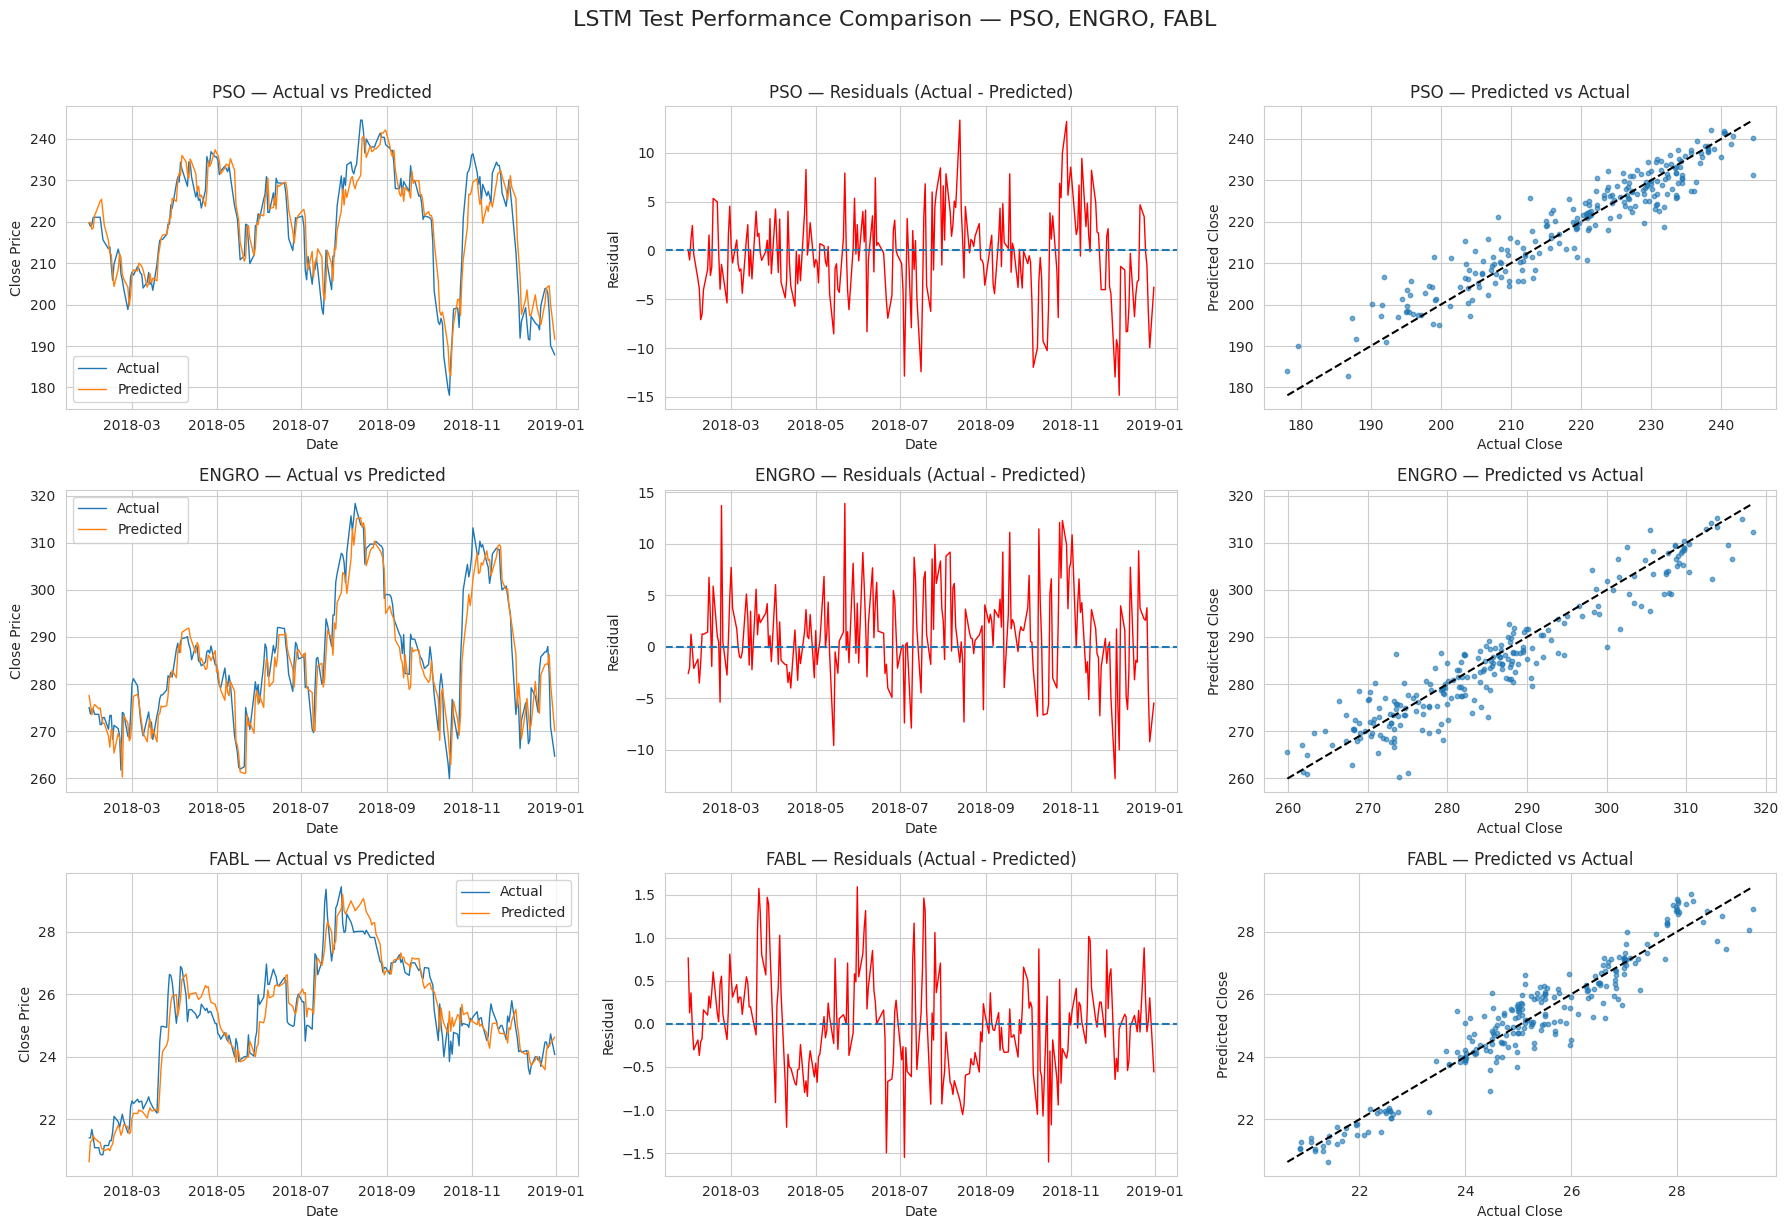

In [ ]:
# COMPARATIVE VISUALIZATION — ALL STOCKS IN ONE FIGURE
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- CONFIGURATION ---
TIME_STEPS = 20
SAVE_DIR = "models"
STOCK_FILES = {
    "PSO": "PSO.csv",
    "ENGRO": "ENGRO.csv",
    "FABL": "FABL.csv"
}
FEATURES = [
    'Log_Return', 'SMA_10', 'SMA_50', 'RSI', 'BB_Upper', 'BB_Lower'
]

# --- Feature Engineering ---
def engineer_features(df):
    df = df.copy()
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['SMA_10'] = df['Close'].rolling(10).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()
    ma20 = df['Close'].rolling(20).mean()
    std20 = df['Close'].rolling(20).std()
    df['BB_Upper'] = ma20 + 2 * std20
    df['BB_Lower'] = ma20 - 2 * std20
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df.dropna(inplace=True)
    return df

# --- Sequence Helper ---
def make_sequences(X, y, steps):
    Xs, ys = [], []
    for i in range(len(X)-steps):
        Xs.append(X[i:i+steps])
        ys.append(y[i+steps])
    return np.array(Xs), np.array(ys)

# --- MinMax Inverse ---
def inverse_minmax(scaled, data_min, data_max):
    data_range = np.where(data_max - data_min == 0, 1e-8, data_max - data_min)
    return scaled * data_range + data_min

# --- Prepare figure ---
fig, axes = plt.subplots(nrows=len(STOCK_FILES), ncols=3, figsize=(18, 12))
fig.tight_layout(pad=5.0)
axes = axes if len(STOCK_FILES) > 1 else [axes]

for i, (stock, file_path) in enumerate(STOCK_FILES.items()):
    # load data and model
    df = pd.read_csv(file_path, parse_dates=['Date']).set_index('Date')
    df.sort_index(inplace=True)
    df = df.loc['2013-01-01':'2018-12-31']
    df = engineer_features(df)
    test = df.loc['2018-01-01':].copy()

    # load scalers and model
    s = np.load(os.path.join(SAVE_DIR, f"{stock}_scalers.npz"))
    X_min, X_max = s['X_min'], s['X_max']
    y_min, y_max = s['y_min'], s['y_max']
    model = load_model(os.path.join(SAVE_DIR, f"{stock}_LSTM_Finetuned.keras"))

    # scale test features
    X_test_raw = test[FEATURES].values.astype(float)
    X_range = np.where(X_max - X_min == 0, 1e-8, X_max - X_min)
    X_scaled = (X_test_raw - X_min) / X_range
    y_test_raw = test[['Close']].values.astype(float)
    y_scaled = (y_test_raw - y_min) / np.where(y_max - y_min == 0, 1e-8, y_max - y_min)

    # sequences
    X_te, y_te_scaled = make_sequences(X_scaled, y_scaled, TIME_STEPS)
    preds_scaled = model.predict(X_te, verbose=0)
    preds = inverse_minmax(preds_scaled, y_min, y_max).reshape(-1)
    actual = inverse_minmax(y_te_scaled.reshape(-1,1), y_min, y_max).reshape(-1)
    dates = test.index[TIME_STEPS:len(preds)+TIME_STEPS]

    # residuals
    residuals = actual - preds

    # ---- Column 1: Actual vs Predicted ----
    ax = axes[i][0]
    ax.plot(dates, actual, label='Actual', linewidth=1)
    ax.plot(dates, preds, label='Predicted', linewidth=1)
    ax.set_title(f"{stock} — Actual vs Predicted")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()

    # ---- Column 2: Residuals ----
    ax = axes[i][1]
    ax.plot(dates, residuals, color='red', linewidth=1)
    ax.axhline(0, linestyle='--')
    ax.set_title(f"{stock} — Residuals (Actual - Predicted)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Residual")

    # ---- Column 3: Predicted vs Actual Scatter ----
    ax = axes[i][2]
    ax.scatter(actual, preds, s=10, alpha=0.6)
    minv, maxv = min(actual.min(), preds.min()), max(actual.max(), preds.max())
    ax.plot([minv,maxv],[minv,maxv], linestyle='--', color='black')
    ax.set_title(f"{stock} — Predicted vs Actual")
    ax.set_xlabel("Actual Close")
    ax.set_ylabel("Predicted Close")

plt.suptitle("LSTM Test Performance Comparison — PSO, ENGRO, FABL", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
